# Inferencia Sugeno - Gradiente Descendente
Utilizando o metodo do gradiente descendente para aproximar a saída para f(x)=x^2

## Autores
Renan Mateus Bernado do Nascimento
<br>Nicolas Arruda Maduro

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [10]:
class IpsilonFunc:
    
    def __init__(self, p, q):
        self.p = p
        self.q = q
        
    def out(self, x):
        return self.p*x + self.q

In [66]:
def plotGraph(xValues, yValues,title,ylabel,xlabel,numberOfPlots):
    if numberOfPlots==1:
        plt.plot(xValues, yValues, label=xlabel)
    elif numberOfPlots==2:
        #plt.plot(xValues, yValues[0], label=xlabel)
        plt.plot(xValues,yValues[1], "o","3432")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.legend()
    plt.show()

In [74]:
class GradientDescent:
    
    def __init__(self, func, domain, input_size, learning_rate, yRange, iteration):
        self.func = func
        self.domain = domain
        self.input_size = input_size
        self.learning_rate = learning_rate
        self.y1 = IpsilonFunc(random.uniform(yRange[0], yRange[1]), random.uniform(yRange[0], yRange[1]))
        self.y2 = IpsilonFunc(random.uniform(yRange[0], yRange[1]), random.uniform(yRange[0], yRange[1]))
        self.input = []
        self.output = []
        self.predOutput = []
        self.iteration = iteration
        self.error_iteration = []
    
    def squareFunc(self, x):
        return x**2
    
    def pertinenceFunc1(self, x):
        return -0.25*x+0.5
    
    def pertinenceFunc2(self, x):
        return 0.25*x+0.5
    
    ''' Initiates input randomly '''
    def initInput(self):
        self.input = [ random.uniform(domain[0], domain[1]) for i in range(0, self.input_size) ]
        self.calcOutput()
            
    ''' Calculates output '''
    def calcOutput(self):
        self.output = [ self.squareFunc(x) for x in self.input ]
        
        
    ''' Calculates predicted output '''
    def calcPredictedOutput(self, x):
        num = self.y1.out(x)*self.pertinenceFunc1(x) + self.y2.out(x)*self.pertinenceFunc2(x)
        den = self.pertinenceFunc1(x)+self.pertinenceFunc2(x)
        return num/den
    
    
    def calcError(self, y, yPred):
        return 0.5*pow((y - yPred), 2)
    
    
    ''' Partial derivative Error -> p '''
    def pDErrorP(self, y, yPred, w, w1, w2, x):
        return (y - yPred)*(w/(w1+w2)*x)
    
    
    ''' Partial derivative Error -> q '''
    def pDErrorQ(self, y, yPred, w, w1, w2):
        return (y - yPred)*(w/(w1+w2))
    
    ''' Updates an y '''
    def update(self, pDErrorP, pDErrorQ):
        print ("sum(pDErrorP) - " + str(sum(pDErrorP)/self.input_size))
        self.y1.p = self.y1.p - self.learning_rate*sum(pDErrorP)/self.input_size
        self.y2.p = self.y2.p - self.learning_rate*sum(pDErrorP)/self.input_size
        self.y1.q = self.y1.q - self.learning_rate*sum(pDErrorQ)/self.input_size
        self.y2.q = self.y2.q - self.learning_rate*sum(pDErrorQ)/self.input_size
    
    def run(self):
        time = []
        
        for i in range(0, iteration):
            time.append(i)
            self.initInput()
            error = []
            pDErrorP_y1 = []
            pDErrorP_y2 = []
            pDErrorQ_y1 = []
            pDErrorQ_y2 = []
            
            for i in range(0, self.input_size):
                yPred = self.calcPredictedOutput(self.input[i])
                error.append(self.calcError(self.output[i], yPred))
                pDErrorP_y1.append(self.pDErrorP(self.output[i], yPred, self.pertinenceFunc1(self.input[i]), self.pertinenceFunc1(self.input[i]), self.pertinenceFunc2(self.input[i]), self.input[i]))
                pDErrorP_y2.append(self.pDErrorP(self.output[i], yPred, self.pertinenceFunc2(self.input[i]), self.pertinenceFunc1(self.input[i]), self.pertinenceFunc2(self.input[i]), self.input[i]))
                pDErrorQ_y1.append(self.pDErrorQ(self.output[i], yPred, self.pertinenceFunc1(self.input[i]), self.pertinenceFunc1(self.input[i]), self.pertinenceFunc2(self.input[i])))
                pDErrorP_y2.append(self.pDErrorQ(self.output[i], yPred, self.pertinenceFunc2(self.input[i]), self.pertinenceFunc1(self.input[i]), self.pertinenceFunc2(self.input[i])))
                
            self.update(pDErrorP_y1, pDErrorQ_y1)
            self.update(pDErrorP_y2, pDErrorQ_y2)
            self.error_iteration.append(sum(error))
            
        self.initInput()
        yPred=[]
        for i in range(0, self.input_size):
            yPred.append(self.calcPredictedOutput(self.input[i]))
        print ("Output")
        print( self.output)
        print ("input")
        print (  self.input)
        print ("yPred")
        print (  yPred)
        plotGraph(self.input, [yPred,self.output],"Grafico bla", "y","x",2)
        plotGraph(time, self.error_iteration,"Grafíco do Erro","Erro","Iterações",1)
        
                
            
        
        
        
    
    

sum(pDErrorP) - -0.07924687519370165
sum(pDErrorP) - -0.45539079836672586
sum(pDErrorP) - -0.08743125352782673
sum(pDErrorP) - -0.5043424933766143
sum(pDErrorP) - -0.10542641143932324
sum(pDErrorP) - -0.584544538521509
sum(pDErrorP) - -0.10453224556165899
sum(pDErrorP) - -0.6062347652075699
sum(pDErrorP) - -0.1195247778230511
sum(pDErrorP) - -0.6789951076213064
sum(pDErrorP) - -0.13257168568874506
sum(pDErrorP) - -0.7466357613820547
sum(pDErrorP) - -0.14968947035110214
sum(pDErrorP) - -0.8465766108821975
sum(pDErrorP) - -0.15472281932561674
sum(pDErrorP) - -0.895298896604256
sum(pDErrorP) - -0.1892581019114132
sum(pDErrorP) - -1.053428215456438
sum(pDErrorP) - -0.21628869344535445
sum(pDErrorP) - -1.2011215959152788
sum(pDErrorP) - -0.22697294280494865
sum(pDErrorP) - -1.2734327454726049
sum(pDErrorP) - -0.24565367871565613
sum(pDErrorP) - -1.3762018449481992
sum(pDErrorP) - -0.24430534129857995
sum(pDErrorP) - -1.4097470355781485
sum(pDErrorP) - -0.26879307939348085
sum(pDErrorP) - -1

No handles with labels found to put in legend.



sum(pDErrorP) - -1725.6925265039297
sum(pDErrorP) - -322.5163354590514
sum(pDErrorP) - -1775.2071192442902
sum(pDErrorP) - -353.5328657220918
sum(pDErrorP) - -1950.1124834294192
sum(pDErrorP) - -416.63796149884234
sum(pDErrorP) - -2355.0047033040723
sum(pDErrorP) - -440.1342796464248
sum(pDErrorP) - -2439.9878877120223
sum(pDErrorP) - -458.2071131992606
sum(pDErrorP) - -2544.7983473451472
sum(pDErrorP) - -554.6405891245246
sum(pDErrorP) - -3073.2578338988114
sum(pDErrorP) - -657.682007447322
sum(pDErrorP) - -3579.860465498445
sum(pDErrorP) - -695.3877793076108
sum(pDErrorP) - -3751.337489798064
sum(pDErrorP) - -746.6435209095664
sum(pDErrorP) - -4113.177027824707
sum(pDErrorP) - -813.4577300272873
sum(pDErrorP) - -4487.966180427992
sum(pDErrorP) - -900.0409577354887
sum(pDErrorP) - -4965.7306302647685
sum(pDErrorP) - -942.0519201675568
sum(pDErrorP) - -5212.017232638039
Output
[0.9226823806964967, 0.22978086628680194, 0.1759910711922236, 0.000755760205893836, 0.09768521746123227, 0.60

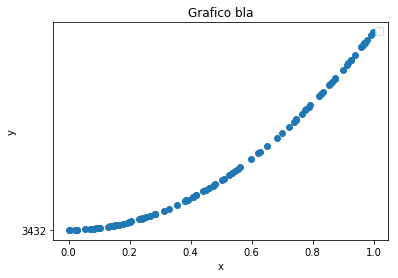

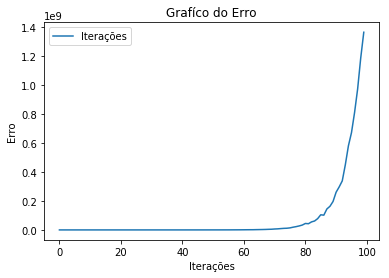

In [77]:
func = 'line'
domain = (0, 1)
input_size = 100
learning_rate = 0.1
yRange = (0, 1)
iteration = 100

gd = GradientDescent(func, domain, input_size, learning_rate, yRange, iteration)
gd.run()